# **TITANIC - *GUIDE POUR DEBUTANTS***

Passagers      : 2224

    Morts      : 1502 (68%)
    
    Survivants : 722  (32%)             


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings('ignore')

SEED = 42

In [2]:
from sklearn.tree import DecisionTreeClassifier

# 1. **Introduction des données.**
**1.1.**  Lecture.

**1.2.**  Aperçu.

**1.3.**  Un modèle 0.

**1.4.**  Nettoyage des valeurs nulles.


# **1.1.**  Lecture.

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
import pandas as pd
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [5]:
train_copy = train.copy()
test_copy = test.copy()

# **1.2.**  Aperçu des données disponibles.

On a 1309 = 891 + 418 passagers. 

# 1.2.1. Le document *train*.

Passagers      : 891 (68% des données disponibles)

    Morts      : 549 (62%)
    
    Survivants : 342 (38%)

In [6]:
train.shape

(891, 12)

In [7]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.info()
# ou
# train.dtype et train.count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McCormack, Mr. Thomas Joseph",male,1601,G6,S
freq,1,577,7,4,644


In [14]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
survived = train[train['Survived'] == 1] # Conserve les 342 lignes de survivants & les 12 colonnes
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


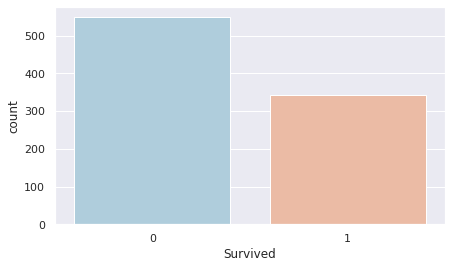

In [16]:
plt.figure(figsize=(7,4))
sns.countplot(x='Survived',data=train,palette='RdBu_r')

On suppose raisonnablement aucune influence de 'PassengerId' sur la survie.

In [17]:
# Suppression de la colonne 'PassengerId'
train = train.drop(['PassengerId'], axis=1)

# 1.2.2. Le document *test*.

Passagers      : 418 (32% des données disponibles)

In [18]:
test.shape

(418, 11)

In [19]:
test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [21]:
test.head() #ou test.tail() pour voir les 5 dernières lignes

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [23]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Wiklund, Mr. Karl Johan",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [24]:
test.drop(['PassengerId'],axis=1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 1.2.3. Concaténation.


**1.2.3.1. Avec 10 colonnes**

Fichier *train* : Suppression de *Survived* et *PassengerId*

Fichier *test* : Suppression de *PassengerId*

In [25]:
train1 = train.drop(['Survived'],axis=1)
train1.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
test1 = test.drop(['PassengerId'],axis=1)
test1.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
# CONCATENER LES DONNEES
combine1 = pd.concat([train1, test1], ignore_index=True)
# ou
# combine1 = [train1,test1]

In [28]:
combine1.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
combine1.iloc[[889,890,891,892]]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
891,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
892,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [30]:
combine1.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# **1.3.**  Un modèle 0.

Etablissons un premier *benchmark* pour se fixer un "niveau 0" de performance algorithmique. Considérons uniquement les variables suivantes (de type int ou float, continues et ne nécessitant aucune imputation de valeurs manquantes) : SisSp, Parch et Fare. 

In [31]:
# Fonction de parsing permettant d'isoler le vecteur à prédire Survived 
# et les variables considérées.
def parse_model_0(X) :
    target = X.Survived
    X = X[['Fare','SibSp','Parch']]
    return X, target

X,y = parse_model_0(train.copy())

# **1.3.1**  Stratégie de validation du modèle 

Le jeu de données est très petit, et utiliser un simple *split* unique des données sera trop dépendant de l'échantillonage. En conséquence, pour augmenter la significativité de la validation, nous utiliserons la moyenne de plusieurs validations croisées, disons 5. 

In [32]:
# Le module cross_val_score réalise 5 validations croisées, c'est-à-dire qu'on entraîne
# sur 4/5 du jeu de données et qu'on teste sur le 1/5 restant.
from sklearn.model_selection import cross_val_score
from numpy import mean
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv = 5)
    return mean(xval)


# **1.3.2**  Algorithme 0 


**1.3.2.1. Régression logistique.**

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
compute_score(lr, X, y)

0.6746092524009792

**1.3.2.2. Random forest.**

In [34]:
import pylab as pl
def clf_importance(X, clf):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    pl.title("Feature importances")
    for tree in clf.estimators_:
        pl.plot(range(X.shape[1]), tree.feature_importances_[indices],"r")
        pl.plot(range(X.shape[1]), importances[indices], "b")
        pl.show();
    for f in range(X.shape[1]):
        print("%d. feature : %s (%f)" % (f + 1, X.columns[indices[f]],importances[indices[f]]))

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
compute_score(rf, X, y)

0.6779360994287866

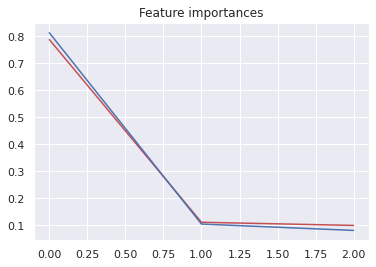

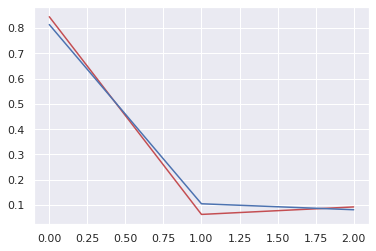

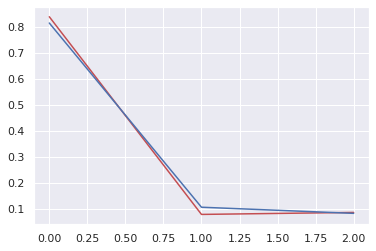

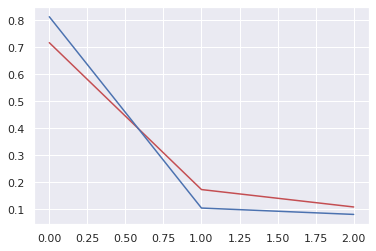

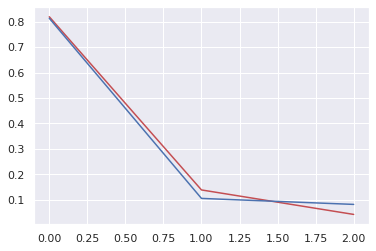

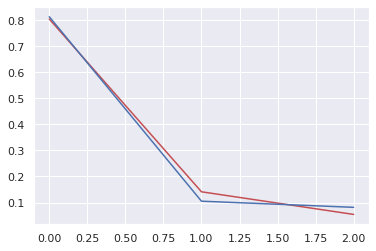

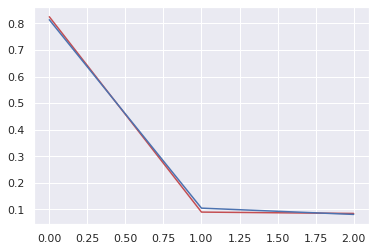

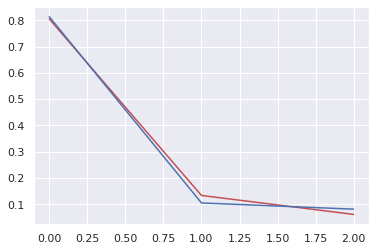

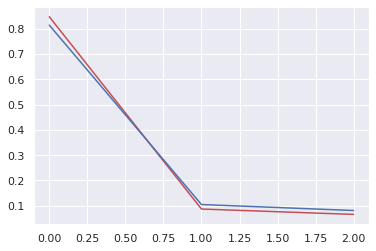

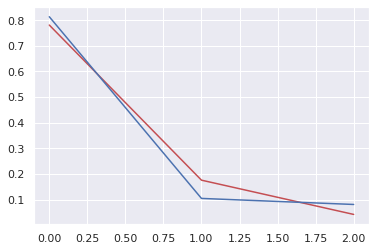

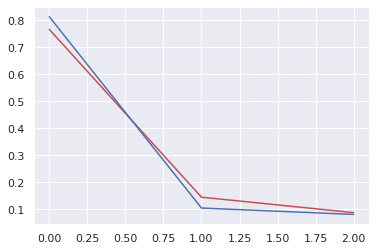

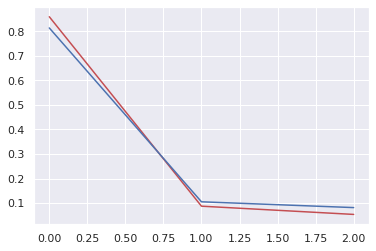

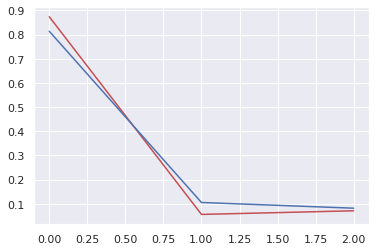

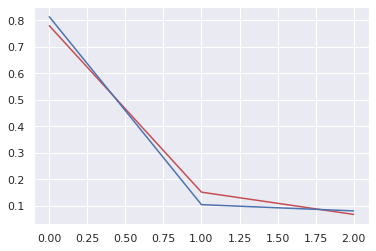

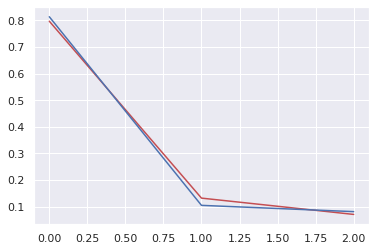

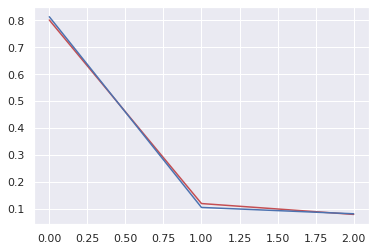

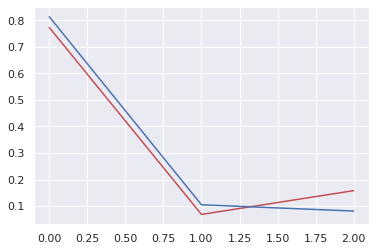

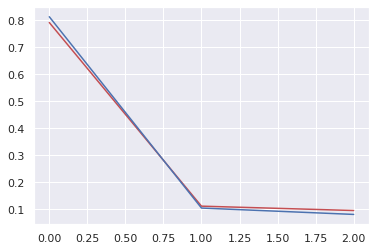

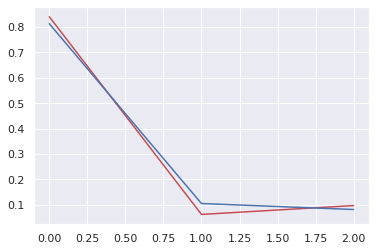

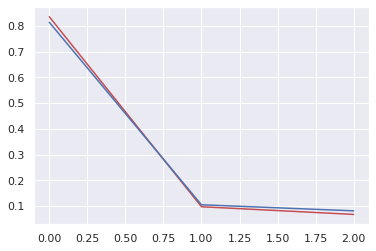

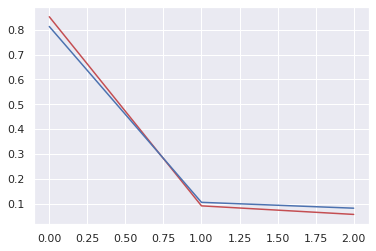

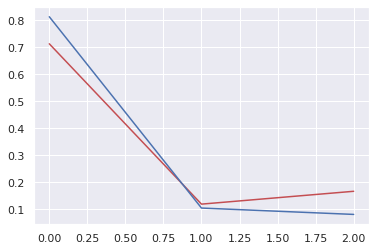

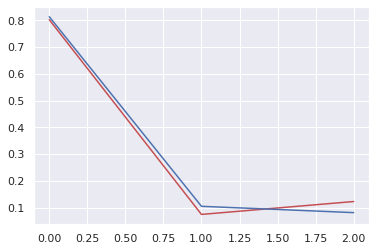

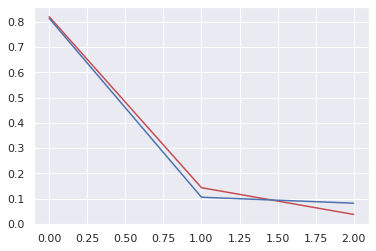

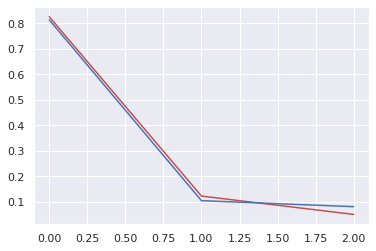

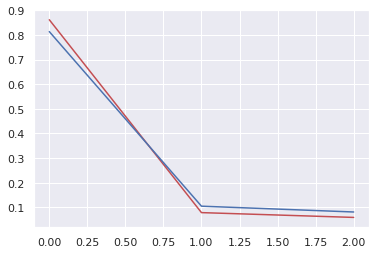

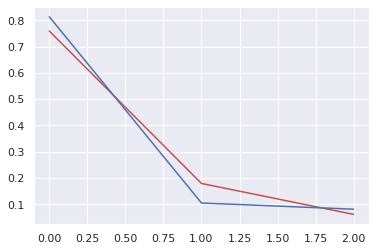

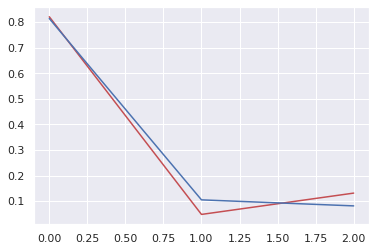

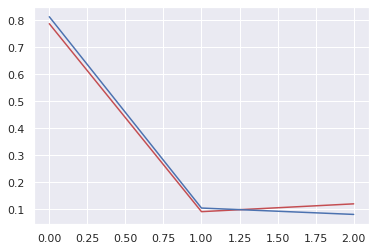

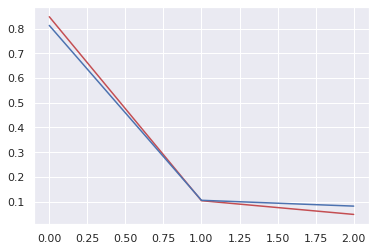

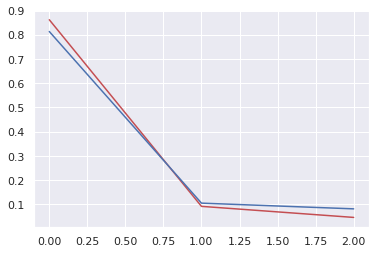

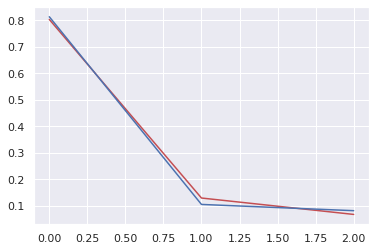

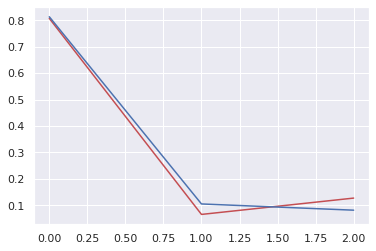

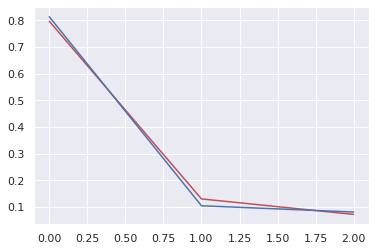

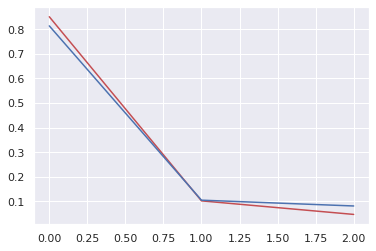

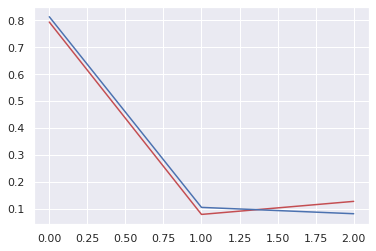

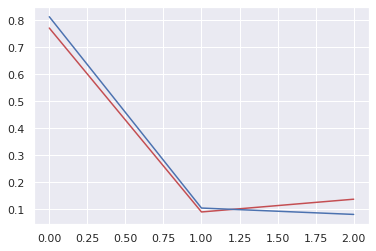

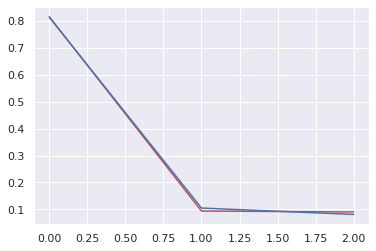

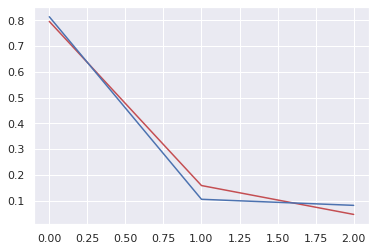

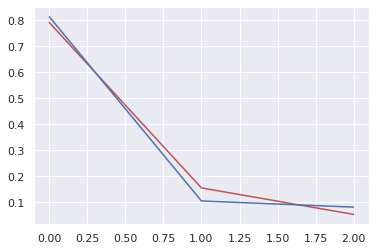

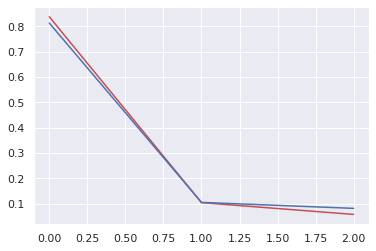

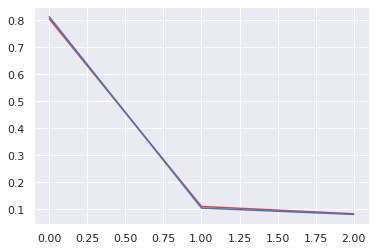

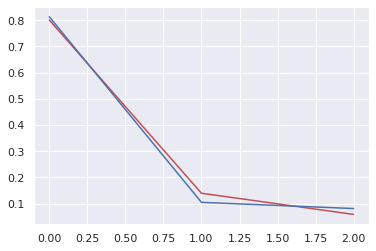

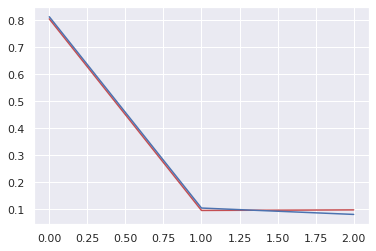

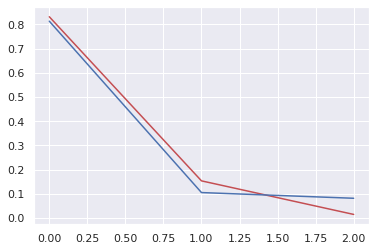

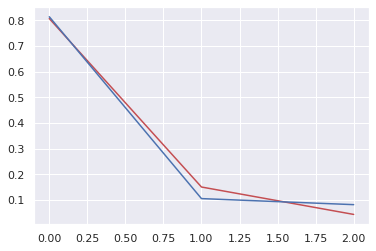

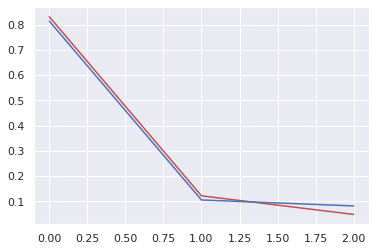

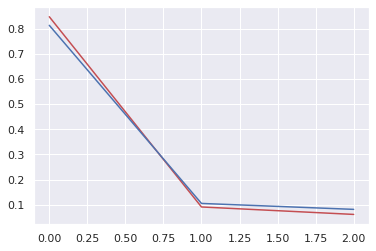

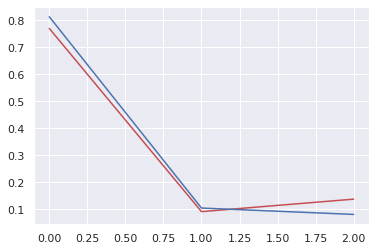

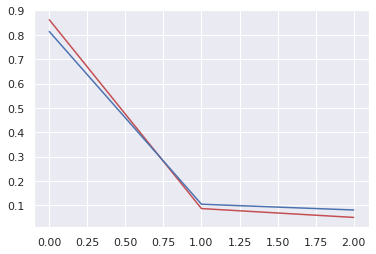

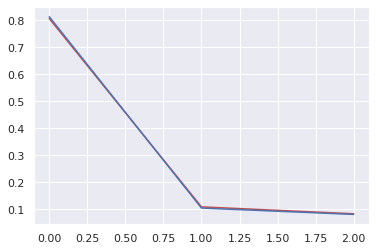

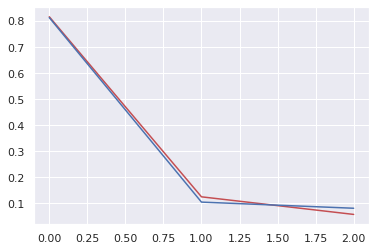

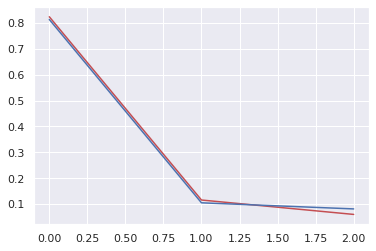

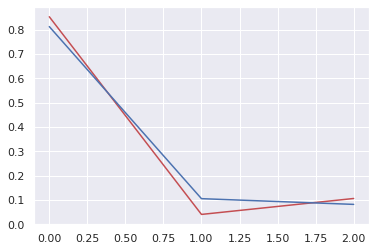

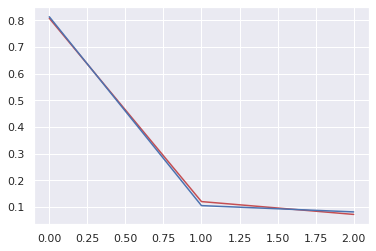

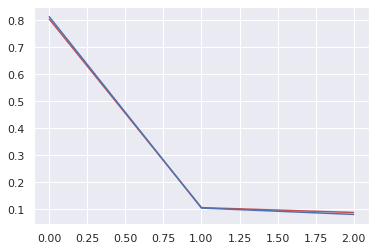

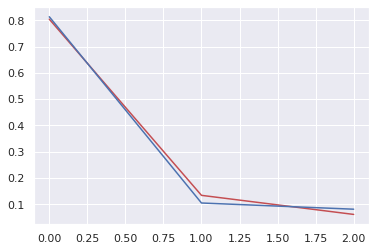

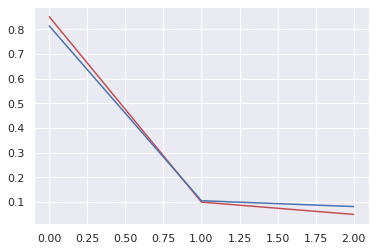

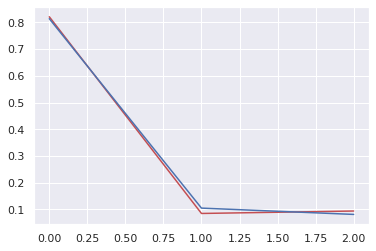

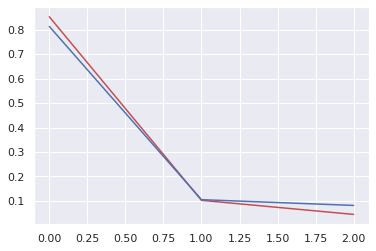

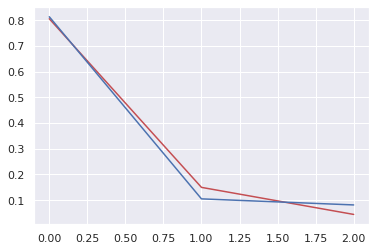

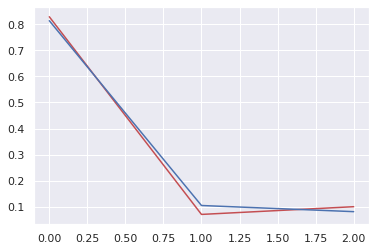

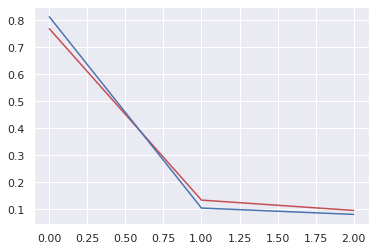

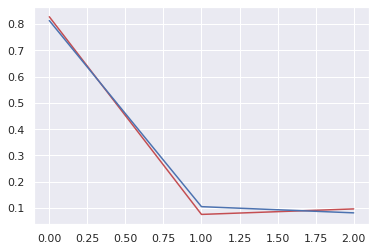

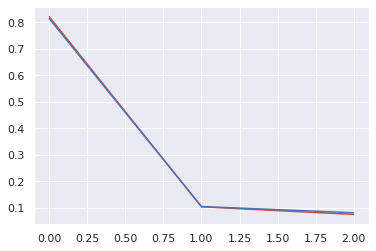

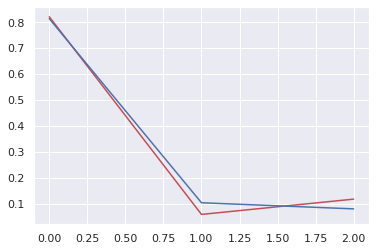

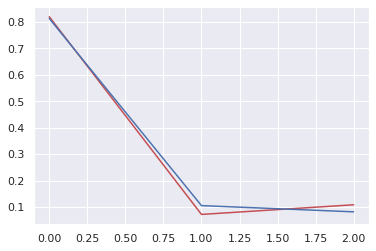

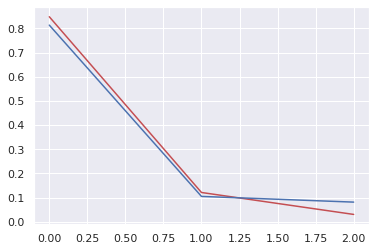

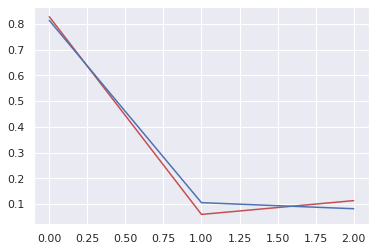

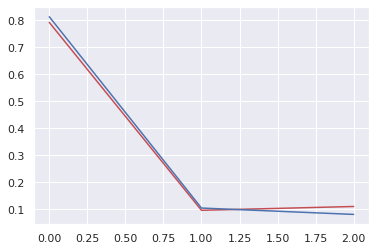

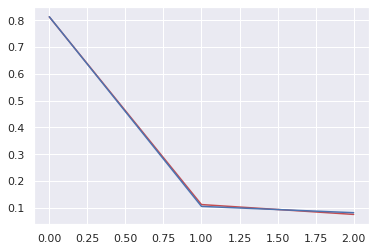

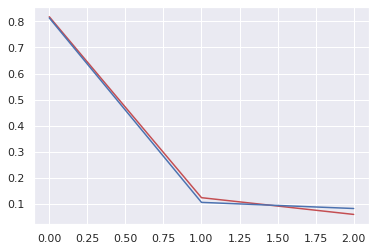

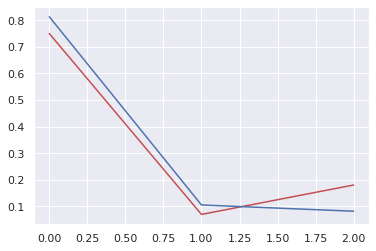

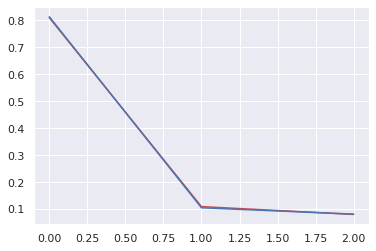

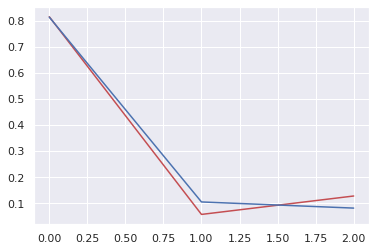

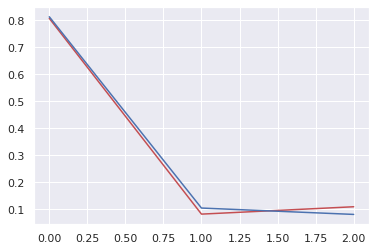

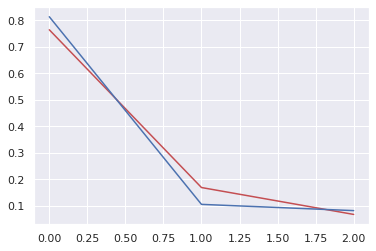

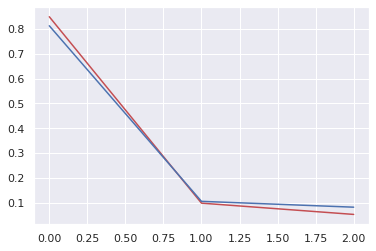

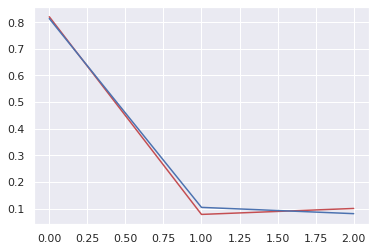

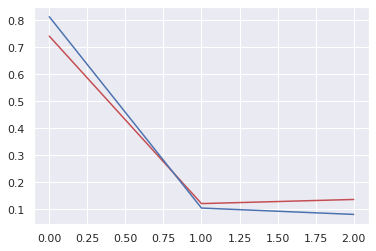

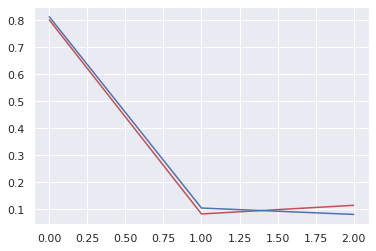

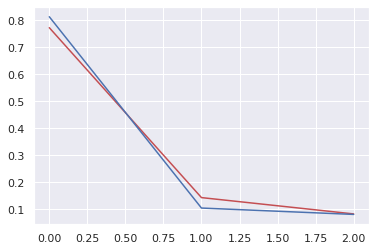

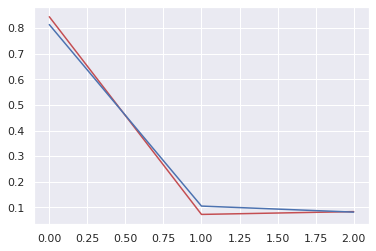

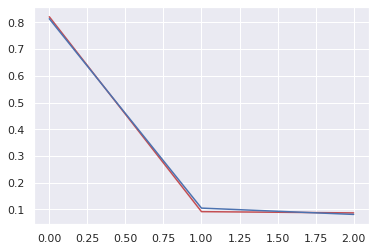

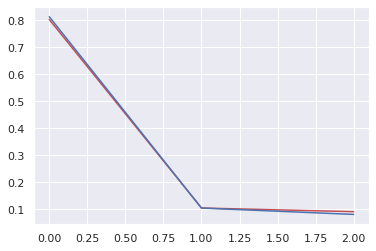

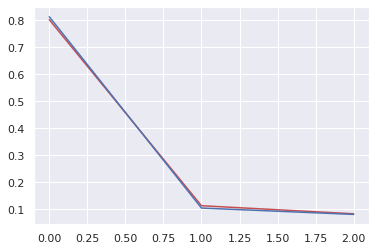

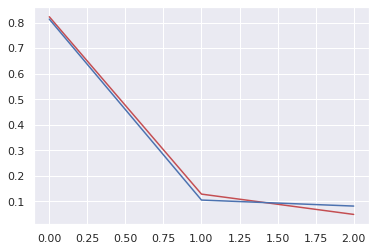

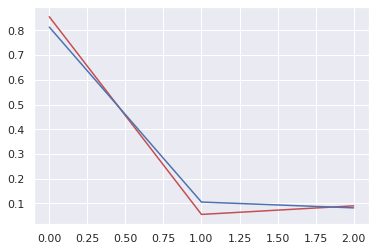

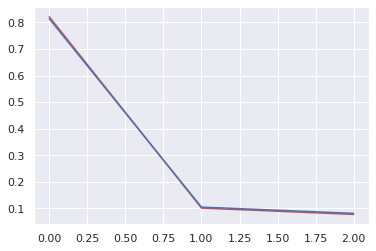

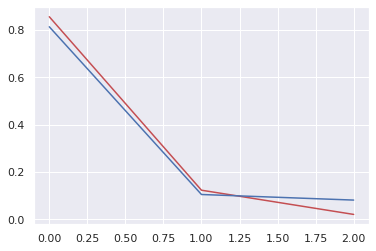

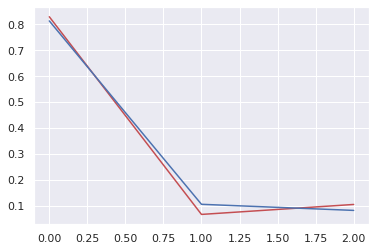

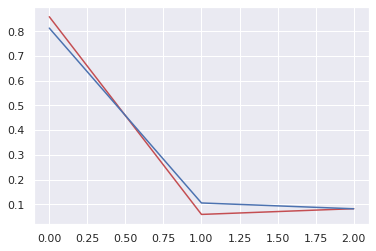

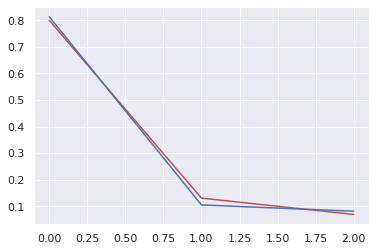

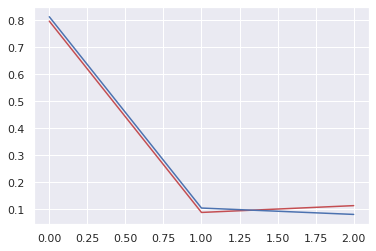

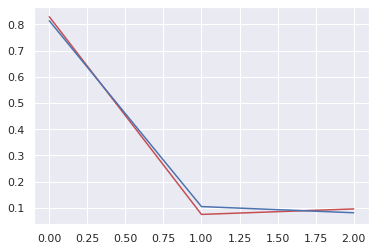

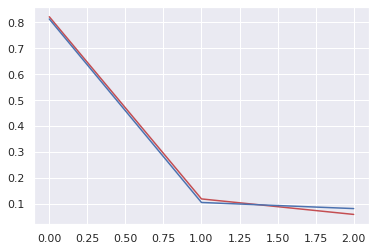

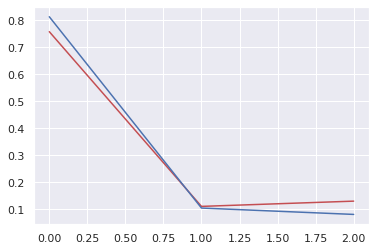

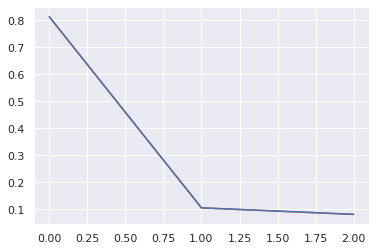

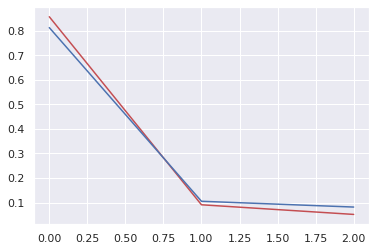

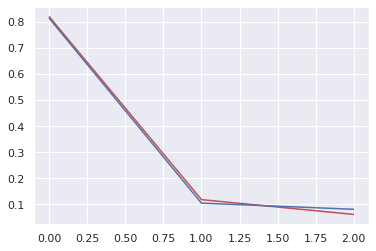

1. feature : Fare (0.813440)
2. feature : SibSp (0.105067)
3. feature : Parch (0.081493)


In [36]:
rf.fit(X, y)
clf_importance(X, rf)

# **1.4.**  Nettoyage des valeurs nulles.

# **1.4.1**  Nettoyage des valeurs nulles du fichier *train*

In [37]:
# METTRE LA COLONNE 'PassengerId' EN INDEX :
# train.set_index(['PassengerId'],inplace=True)
# OU
# train.set_index('PassengerId',inplace=True,drop=True)
# L'option drop=True prend l'hypothèse que l'index ne porte aucune valeur métier

In [38]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

On a 3 colonnes présentant des valeurs nulles, '*Age*', '*Cabin*' et '*Embarked*'.

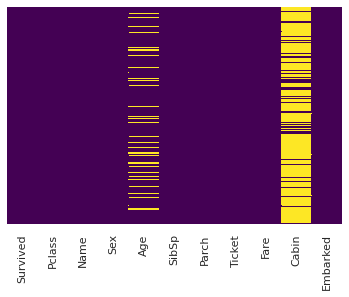

In [39]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**1.4.1.1. Colonne 'Age' par moyenne.**

In [40]:
# REMPLACER LES VALEURS PAR LA MOYENNE
# train['Age'] = train['Age'].fillna(value=all['Age'].median())

**1.4.1.2. Colonne 'Age' par classe.**

Plutôt que remplacer grossièrement les valeurs manquantes par la moyenne, intéressons-nous à l'âge des passagers en fonction de leur classe.

Text(0.5, 1.0, 'Fichier Test')

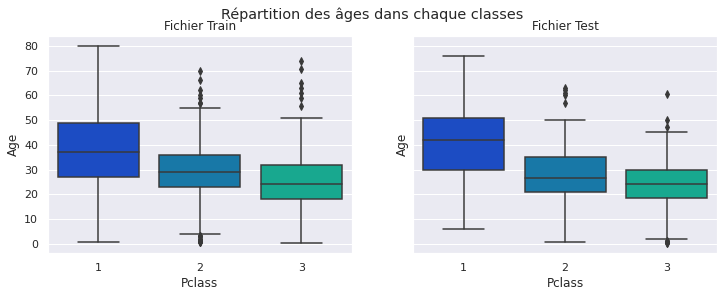

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle('Répartition des âges dans chaque classes')

sns.boxplot(ax=axes[0], x='Pclass',y='Age',data=train,palette='winter')
axes[0].set_title("Fichier Train")

sns.boxplot(ax=axes[1], x='Pclass',y='Age',data=test,palette='winter')
axes[1].set_title("Fichier Test")

In [42]:
def impute_age(cols):
    """Fonction déterminant la valeur remplaçante de l'age en fonction de la classe"""
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [43]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

train['Age'] = train['Age'].astype(int)
test['Age']  = test['Age'].astype(int)

In [44]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**1.4.1.3. Colonne 'Embarked'**

In [45]:
train['Embarked'] = train['Embarked'].fillna('S')

In [46]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

# **1.4.2.**  Nettoyage des valeurs nulles du fichier *test*.

In [47]:
# METTRE LA COLONNE 'PassengerId' EN INDEX :
# test.set_index(['PassengerId'],inplace=True)

In [48]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 2. **Etude des variables.**

**2.1.**  '*Pclass*'.

**2.2.**  '*Sex*'.

**2.3.**  '*Age*'.

**2.4.**  '*SibSp'*.

**2.5.**  '*Parch*'.

**2.6.**  '*Ticket*'.

**2.7.**  '*Fare*'.

**2.8.**  '*Cabin*'.

**2.9.**  '*Embarked*'.

**2.10.**  '*Name*'.

# 2.1. 'Pclass'.

# 2.1.1. En valeurs. 

In [49]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [50]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

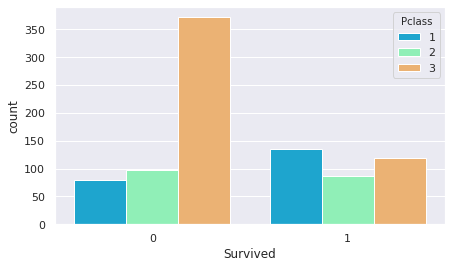

In [51]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

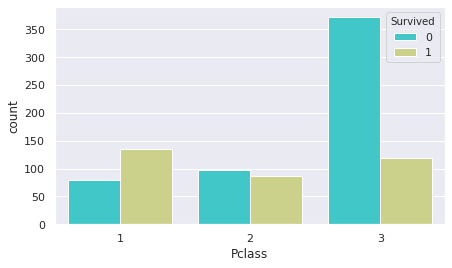

In [52]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Pclass',hue='Survived',data=train,palette='rainbow')

# 2.1.2. En moyenne 

In [53]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
# .sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Moyenne de survie par classe des billets')

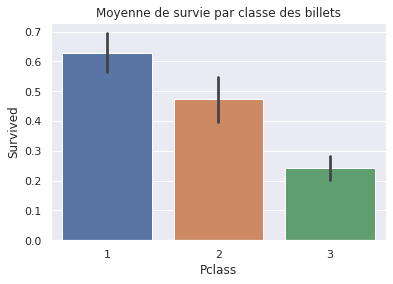

In [54]:
sns.barplot(x='Pclass', y='Survived', data=train).set_title('Moyenne de survie par classe des billets')

# SI ON UTILISE PAS SNS 
# train.groupby('Pclass').Survived.mean().plot(kind='bar') 

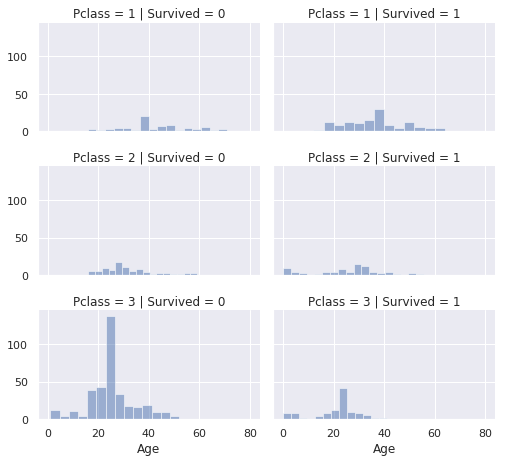

In [55]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [56]:
#dtree = DecisionTreeClassifier()
#X_train = train[['Pclass']]
#y = train['Survived']
#X_test = test[['Pclass']]
#dtree.fit(X_train,y)
#prediction = dtree.predict(X_test)
#dfPrediction = pd.DataFrame(data=prediction,index = test.index.values,columns=['Survived'])
#contentTestPredObject1 = dfPrediction.to_csv()
#print(contentTestPredObject1)

# 2.1.3. Algorithme 1 : avec 'Pclass'

In [57]:
X1 = train.copy()[['Fare','SibSp','Parch','Pclass']]
X1.head()

,Fare,SibSp,Parch,Pclass
0,7.2500,1,0,3
1,71.2833,1,0,1
2,7.9250,0,0,3
3,53.1000,1,0,1
4,8.0500,0,0,3


In [58]:
pclass_X1 = pd.get_dummies(X1['Pclass'], drop_first = True)
X1.drop(['Pclass'],axis=1,inplace=True)
X1 = pd.concat([X1,pclass_X1],axis=1)
X1.head()

,Fare,SibSp,Parch,2,3
0,7.2500,1,0,0,1
1,71.2833,1,0,0,0
2,7.9250,0,0,0,1
3,53.1000,1,0,0,0
4,8.0500,0,0,0,1


In [59]:
lr = LogisticRegression()
compute_score(lr, X1, y)

0.695951289937857

Nous obtenons une amélioration de 2 points ce qui n'est pas négligeable. 

***0.6959-0.6746=0,0213***

Intéressons-nous au poids que la régression logistique accorde à chaque variable.
- Un poids positif augmente la probabilité
- Un poids négatif diminue la probabilité
- Un poids proche de 0 signifie qu'il est très peu discriminant par rapport à la cible à prédire

In [60]:
lr.fit(X1, y)
print(lr.coef_)

[[ 0.00714743 -0.15380233  0.23060983 -0.22137854 -1.17467465]]


- La variable Fare semble avoir une importance négligeable (0.01).
- La classe 3 est très discriminante (-1.17).

# 2.2. 'Sex'.

La colonne 'Sex' prend comme valeur 'male' ou 'femelle'. On remplace par une colonne 'Genre' prenant comme valeur 1 et 0 respectivement pour 'male' et 'femelle'.

# 2.2.1. En valeurs.

In [61]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [62]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

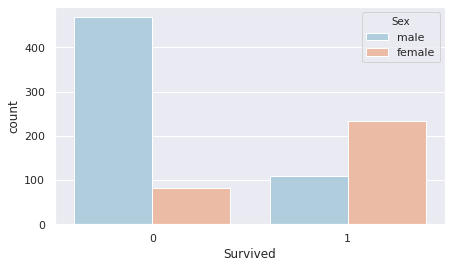

In [63]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
# train.groupby('Sex').Survived.mean().plot(kind='bar')


# 2.2.2. En moyenne.

In [64]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


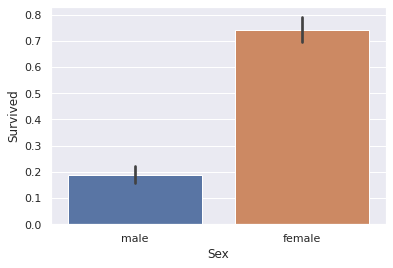

In [65]:
sns.barplot(x='Sex', y='Survived', data=train)

# SI ON UTILISE PAS SNS
# train.groupby('Sex').Survived.mean().plot(kind='bar')

# 2.2.3. Si l'on considère également la colonne 'Pclass.

In [66]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

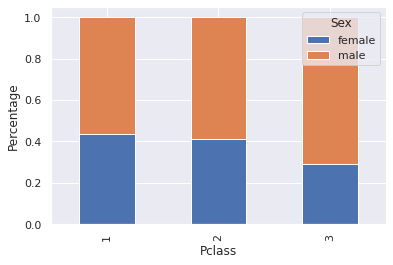

In [67]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

Evaluons l'influence de ces deux paramètres sur la survie.

<Figure size 504x288 with 0 Axes>

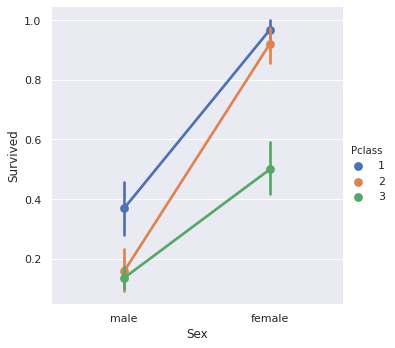

In [68]:
plt.figure(figsize=(7, 4))
sns.factorplot("Sex", "Survived", hue="Pclass", data=train);
#sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

In [69]:
#for dataset in combine:
#    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#train.head()

# OU 
sex_train = pd.get_dummies(train['Sex'],drop_first=True)
sex_test = pd.get_dummies(test['Sex'], drop_first=True)

train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

train = pd.concat([train,sex_train],axis=1)
test = pd.concat([test, sex_test], axis=1)

combine = pd.concat([train, test], ignore_index=True)
#train.head()

In [70]:
combine.tail()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,PassengerId
1304,NaN,3,"Spector, Mr. Woolf",24,0,0,A.5. 3236,8.0500,NaN,S,1,1305.0
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",39,0,0,PC 17758,108.9000,C105,C,0,1306.0
1306,NaN,3,"Saether, Mr. Simon Sivertsen",38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,1307.0
1307,NaN,3,"Ware, Mr. Frederick",24,0,0,359309,8.0500,NaN,S,1,1308.0
1308,NaN,3,"Peter, Master. Michael J",24,1,1,2668,22.3583,NaN,C,1,1309.0


# 2.2.4. Algorithme 2 : avec 'Sex'.

In [71]:
X2 = train_copy.copy()[['Fare','SibSp','Parch','Pclass','Sex']]

pclass_X2 = pd.get_dummies(X2['Pclass'], drop_first = True)
X2.drop(['Pclass'],axis=1,inplace=True)
X2 = pd.concat([X2,pclass_X2],axis=1)

sex_X2 = pd.get_dummies(X2['Sex'], drop_first = True)
X2.drop(['Sex'],axis=1,inplace=True)
X2 = pd.concat([X2,sex_X2],axis=1)

X2.head()

,Fare,SibSp,Parch,2,3,male
0,7.2500,1,0,0,1,1
1,71.2833,1,0,0,0,0
2,7.9250,0,0,0,1,0
3,53.1000,1,0,0,0,0
4,8.0500,0,0,0,1,1


In [72]:
lr = LogisticRegression()
compute_score(lr, X2, y)

0.7957253154227606

***0,7957-0.6959=0,0998***

In [73]:
lr.fit(X2, y)
print(lr.coef_)

[[ 0.00459757 -0.25270043 -0.08745031 -0.51180906 -1.46709242 -2.63397317]]


# 2.3. 'Age'

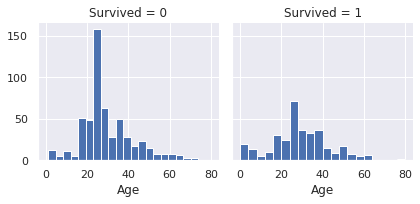

In [74]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# 2.3.1. Algorithme 3 : avec 'Age'.

Remplaçons simplement les âges manquants par la médiane.

In [75]:
X3 = train_copy.copy()[['Fare','SibSp','Parch','Pclass','Sex','Age']]

pclass_X3 = pd.get_dummies(X3['Pclass'], drop_first = True)
X3.drop(['Pclass'],axis=1,inplace=True)
X3 = pd.concat([X3,pclass_X3],axis=1)

sex_X3 = pd.get_dummies(X3['Sex'], drop_first = True)
X3.drop(['Sex'],axis=1,inplace=True)
X3 = pd.concat([X3,sex_X3],axis=1)

X3['Age'] = X3.Age.fillna(X3.Age.median())

X3.head()

,Fare,SibSp,Parch,Age,2,3,male
0,7.2500,1,0,22.0,0,1,1
1,71.2833,1,0,38.0,0,0,0
2,7.9250,0,0,26.0,0,1,0
3,53.1000,1,0,35.0,0,0,0
4,8.0500,0,0,35.0,0,1,1


In [76]:
lr = LogisticRegression()
compute_score(lr, X3, y)

0.785638064151654

Le score de l'algorithme 3 est moins bon que celui de l'algorithme 2.

In [77]:
lr.fit(X3, y)
print(lr.coef_)

[[ 0.00404542 -0.33706412 -0.10608814 -0.03656612 -0.81044682 -1.91249076
  -2.62598113]]


# 2.3.2. Algorithme 4 : avec 'Age' mieux utilisé


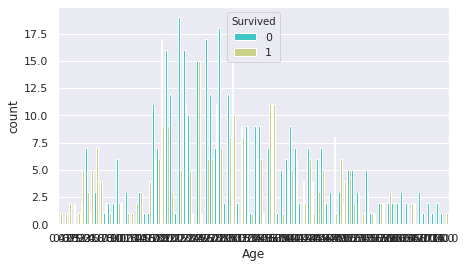

In [78]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Age',hue='Survived',data=train_copy,palette='rainbow')

Les enfants étant sauvés, créons une nouvelle variable pour mieux faire parler l'âge.

In [79]:
X4 = train_copy.copy()[['Fare','SibSp','Parch','Pclass','Sex','Age']]

pclass_X4 = pd.get_dummies(X4['Pclass'], drop_first = True)
X4.drop(['Pclass'],axis=1,inplace=True)
X4 = pd.concat([X4,pclass_X4],axis=1)

sex_X4 = pd.get_dummies(X4['Sex'], drop_first = True)
X4.drop(['Sex'],axis=1,inplace=True)
X4 = pd.concat([X4,sex_X4],axis=1)

X4['Age'] = X4.Age.fillna(X4.Age.median()) # ne fonctionne pas si on enlève cette ligne

X4['is_child'] = X4.Age < 8

X4.head()

,Fare,SibSp,Parch,Age,2,3,male,is_child
0,7.2500,1,0,22.0,0,1,1,False
1,71.2833,1,0,38.0,0,0,0,False
2,7.9250,0,0,26.0,0,1,0,False
3,53.1000,1,0,35.0,0,0,0,False
4,8.0500,0,0,35.0,0,1,1,False


In [80]:
lr = LogisticRegression()
compute_score(lr, X4, y)

0.805818843763731

In [81]:
lr.fit(X4, y)
print(lr.coef_)

[[ 0.00548376 -0.42071742 -0.21145196 -0.01556156 -0.59012507 -1.65546937
  -2.72554076  2.07024889]]


On constate l'importance de la variable 'is_child' (2.07).

# 2.4. 'SibSp'

In [82]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [83]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [84]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


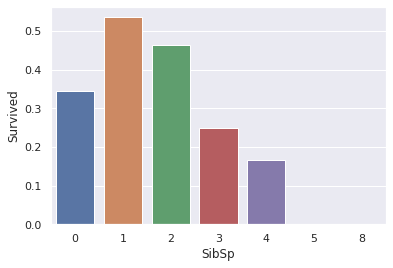

In [85]:
sns.barplot(x='SibSp', y='Survived', ci=None, data=train) # ci=None will hide the error bar

# SI ON UTILISE PAS SNS
#train.groupby('SibSp').Survived.mean().plot(kind='bar')

# 2.5. 'Parch'

In [86]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [87]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [88]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


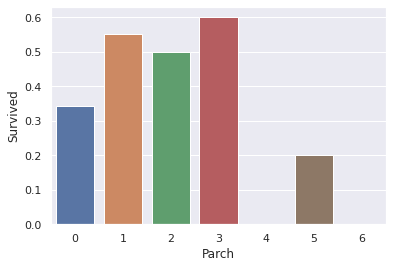

In [89]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train) # ci=None will hide the error bar

# SI ON UTILISE PAS SNS
#train.groupby('Parch').Survived.mean().plot(kind='bar')

In [90]:
combine.Parch.value_counts()


0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [91]:
train1 = train.copy()
test1 = test.copy()

train1['ParchCat'] = train1.Parch.copy().astype(int)
train1.loc[train1.Parch > 2,'ParchCat'] = 3
test1['ParchCat'] = test1.Parch.copy().astype(int)
test1.loc[test1.Parch > 2,'ParchCat'] = 3

In [92]:
train1.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,ParchCat
0,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,C,0,0
2,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,0,0
4,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,NaN,S,1,0


In [93]:
train1.tail()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,ParchCat
886,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13.00,NaN,S,1,0
887,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.00,B42,S,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24,1,2,W./C. 6607,23.45,NaN,S,0,2
889,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.00,C148,C,1,0
890,0,3,"Dooley, Mr. Patrick",32,0,0,370376,7.75,NaN,Q,1,0


In [94]:
test1.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,ParchCat
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,NaN,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,NaN,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,NaN,Q,1,0
3,895,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,NaN,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,NaN,S,0,1


In [95]:
test1.tail()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,ParchCat
413,1305,3,"Spector, Mr. Woolf",24,0,0,A.5. 3236,8.0500,NaN,S,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,0
416,1308,3,"Ware, Mr. Frederick",24,0,0,359309,8.0500,NaN,S,1,0
417,1309,3,"Peter, Master. Michael J",24,1,1,2668,22.3583,NaN,C,1,1


# 2.6. 'Ticket'

In [96]:
train= train.drop(['Ticket'], axis=1)
test= test.drop(['Ticket'], axis=1)

train1 = train1.drop(['Ticket'], axis=1)
test1 = test1.drop(['Ticket'], axis=1)

# 2.7. 'Fare'

On remplace grossièrement par la moyenne.

In [97]:
#grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
#grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
#grid.add_legend()

In [98]:
test["Fare"].fillna(test["Fare"].median(), inplace=True)
test1["Fare"].fillna(test1["Fare"].median(), inplace=True)

# 2.8. 'Cabin'

Trop de valeurs nulles, ce n'est pas abérant de supprimer complètement la colonne 'Cabin'.

In [99]:
# Drop Cabin attribute from both the dataset
train.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin", axis=1, inplace=True)

train1.drop("Cabin",axis=1,inplace=True)
test1.drop("Cabin", axis=1, inplace=True)

In [100]:
#X5['Cabin'] = X5.Cabin.map(lambda x : x[0] if not pd.isnull(x) else -1)
#X5.head()

In [101]:
#lr = LogisticRegression()
#compute_score(lr, X5, y)

# 2.9. 'Embarked'

# 2.9.1. En valeur.

In [102]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

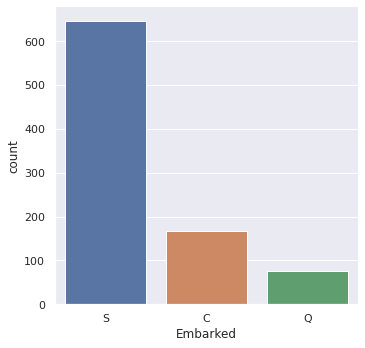

In [103]:
sns.catplot(x = 'Embarked', kind = 'count', data = train)

In [104]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

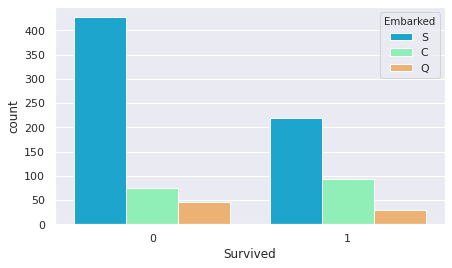

In [105]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Survived',hue='Embarked',data=train,palette='rainbow')

# 2.9.2. En moyenne.

In [106]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


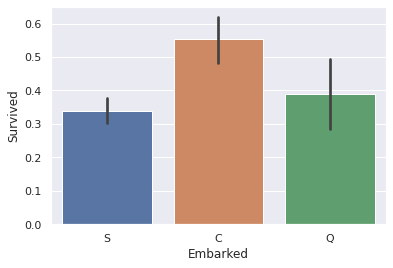

In [107]:
sns.barplot(x='Embarked', y='Survived', data=train)

# SI ON UTILISE PAS SNS
# train.groupby('Embarked').Survived.mean().plot(kind='bar')

# 2.9.3. 'Embarked' en lien avec 'Pclass' et 'Sex'

In [108]:
#sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

In [109]:
embark_train = pd.get_dummies(train['Embarked'],drop_first=True)
emark_test = pd.get_dummies(test['Embarked'], drop_first=True)

# Drop Emarked column
train.drop(['Embarked'],axis=1,inplace=True)
test.drop(['Embarked'],axis=1,inplace=True)

# Concat new embark columns in respective datasets
train = pd.concat([train,embark_train],axis=1)
test = pd.concat([test, emark_test], axis=1)





embark_train1 = pd.get_dummies(train1['Embarked'],drop_first=True)
emark_test1 = pd.get_dummies(test1['Embarked'], drop_first=True)

# Drop Emarked column
train1.drop(['Embarked'],axis=1,inplace=True)
test1.drop(['Embarked'],axis=1,inplace=True)

# Concat new embark columns in respective datasets
train1 = pd.concat([train1,embark_train1],axis=1)
test1 = pd.concat([test1, emark_test1], axis=1)

In [110]:
len(test1)

418

In [111]:
test1.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,male,ParchCat,Q,S
0,892,3,"Kelly, Mr. James",34,0,0,7.8292,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,7.0000,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,9.6875,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27,0,0,8.6625,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,12.2875,0,1,0,1


# 2.10. 'Name'.

In [112]:
train= train.drop(['Name'], axis=1)
test= test.drop(['Name'], axis=1)

train1= train1.drop(['Name'], axis=1)
test1= test1.drop(['Name'], axis=1)

# 2.2.1. Algorithme 5 : avec 'Name'

On extrait les *titres* (Mr, Mrs, Miss...) et les *surnoms* de la variable 'Name'. 

In [113]:
X5 = train_copy.copy()[['Fare','SibSp','Parch','Pclass','Sex','Age','Name']]

pclass_X5 = pd.get_dummies(X5['Pclass'], drop_first = True)
X5.drop(['Pclass'],axis=1,inplace=True)
X5 = pd.concat([X5,pclass_X5],axis=1)

sex_X5 = pd.get_dummies(X5['Sex'], drop_first = True)
X5.drop(['Sex'],axis=1,inplace=True)
X5 = pd.concat([X5,sex_X5],axis=1)

X5['Age'] = X5.Age.fillna(X5.Age.median()) # ne fonctionne pas si on enlève cette ligne
X5['is_child'] = X5.Age < 8

X5['title'] = X5.Name.map(lambda x : x.split(',')[1].split('.')[0])
title_X5 = pd.get_dummies(X5['title'], drop_first = True)
X5.drop(['title'],axis=1,inplace=True)
X5 = pd.concat([X5,title_X5],axis=1)
X5['surname'] = X5.Name.map(lambda x : '(' in x)
X5= X5.drop(['Name'], axis=1)

X5.head()

,Fare,SibSp,Parch,Age,2,3,male,is_child,Col,Don,...,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,surname
0,7.2500,1,0,22.0,0,1,1,False,0,0,...,0,0,0,1,0,0,0,0,0,False
1,71.2833,1,0,38.0,0,0,0,False,0,0,...,0,0,0,0,1,0,0,0,0,True
2,7.9250,0,0,26.0,0,1,0,False,0,0,...,1,0,0,0,0,0,0,0,0,False
3,53.1000,1,0,35.0,0,0,0,False,0,0,...,0,0,0,0,1,0,0,0,0,True
4,8.0500,0,0,35.0,0,1,1,False,0,0,...,0,0,0,1,0,0,0,0,0,False


In [114]:
lr = LogisticRegression()
compute_score(lr, X5, y)

0.8226727763480006

# 3. Modèles de ML

**3.1. Linear Regression**

**3.2. Logistic Regression**

**3.3. Support Vector Machines**

**3.4. KNeighbors Classifier**

**3.5. Gaussian Naive Bayes**

**3.6. Gradient Boosting Classifier**

**3.7. Random Forest**

**3.8. Linear Support Vector Classification**

**3.9. Decision Tree Classifier**

**3.10. Perceptron**

**3.11. Stochastic Gradient Descent (SGD)**



# 3.1. Linear Regression.

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
test1.tail()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,ParchCat,Q,S
413,1305,3,24,0,0,8.0500,1,0,0,1
414,1306,1,39,0,0,108.9000,0,0,0,0
415,1307,3,38,0,0,7.2500,1,0,0,1
416,1308,3,24,0,0,8.0500,1,0,0,1
417,1309,3,24,1,1,22.3583,1,1,0,0


In [117]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop('PassengerId', axis=1)

X_train1 = train1.drop('Survived', axis=1)
y_train1 = train1['Survived']
X_test1 = test1.drop('PassengerId', axis=1)
test1["Fare"].fillna(test1["Fare"].median(), inplace=True)
train1["Fare"].fillna(train1["Fare"].median(), inplace=True)

In [118]:
len(X_test1)

418

In [119]:
X_train1.tail()

,Pclass,Age,SibSp,Parch,Fare,male,ParchCat,Q,S
886,2,27,0,0,13.00,1,0,0,1
887,1,19,0,0,30.00,0,0,0,1
888,3,24,1,2,23.45,0,2,0,1
889,1,26,0,0,30.00,1,0,0,0
890,3,32,0,0,7.75,1,0,1,0


In [120]:
len(y_train)

891

In [121]:
len(X_train1)

891

In [122]:
lm = LinearRegression()
lm.fit(X_train,y_train)
Prediction = lm.predict(X_test)

lm.score(X_train,y_train)

0.3994507496285884

In [123]:
lin_score = lm.score(X_train,y_train)

# 3.2. Logistic Regression.

# 3.2.1.

In [124]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train, y_train)

Prediction = log.predict(X_test)

log.score(X_train, y_train)

0.8092031425364759

In [125]:
log_score = log.score(X_train, y_train)

# 3.2.2.

In [126]:
#from sklearn.model_selection import train_test_split
#X_train1, X_test1, y_train1, y_test1 = train_test_split(train.drop(['Survived'],axis=1), 
  #                                                  train['Survived'], test_size=0.30, 
  #                                                  random_state=101)

In [127]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [128]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test1,Prediction))

# 3.3. Support Vector Machines

In [129]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)

Prediction_SVM = svc.predict(X_test)

svc.score(X_train, y_train)

0.6823793490460157

In [130]:
svc_score = svc.score(X_train, y_train)

# 3.4. k -Nearest Neighbors Classifier

In [131]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

Prediction_KNC = knn.predict(X_test)

knn.score(X_train, y_train)

0.9809203142536476

In [132]:
knn_score = knn.score(X_train, y_train)

In [133]:
clff = KNeighborsClassifier(n_neighbors = 3)
clff.fit(X_train, y_train)
y_pred_knn = clff.predict(X_test)
clff.score(X_train, y_train)


0.835016835016835

# 3.5. Gaussian Naive Bayes

In [134]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()

gaussian.fit(X_train, y_train)

Prediction_G = gaussian.predict(X_test)

gaussian.score(X_train, y_train)

0.7901234567901234

In [135]:
gaussian_score = gaussian.score(X_train, y_train)

# 3.6. Gradient Boosting Classifier

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier(n_estimators=100)
gradient_boost.fit(X_train, y_train)

Prediction_GBC = gradient_boost.predict(X_test)

gradient_boost.score(X_train, y_train)

0.8911335578002245

In [137]:
gradient_score = gradient_boost.score(X_train, y_train)

# 3.7. Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
RFC_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

0.9820426487093153

In [139]:
random_forest_score = random_forest.score(X_train, y_train)

# 3.8. Linear Support Vector Classification

In [140]:
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
clf.score(X_train, y_train)

0.7811447811447811

In [141]:
svc_score = clf.score(X_train, y_train)

# 3.9. Decision Tree Classifier

In [142]:
clfff = DecisionTreeClassifier()
clfff.fit(X_train, y_train)
y_pred_decision_tree = clfff.predict(X_test)
clfff.score(X_train, y_train)

0.9820426487093153

In [143]:
decision_tree_classifier_score = clfff.score(X_train, y_train)

In [144]:
len(X_test1)

418

In [145]:
clfff1 = DecisionTreeClassifier()
clfff1.fit(X_train1, y_train1)
y_pred_decision_tree1 = clfff1.predict(X_test1)
clfff1.score(X_train1, y_train1)

0.9820426487093153

In [146]:
decision_tree_classifier_score1 = clfff1.score(X_train1, y_train1)

In [147]:
len(y_pred_decision_tree1)

418

# 3.10. Perceptron

In [148]:
from sklearn.linear_model import Perceptron
cllf = Perceptron(max_iter=5, tol=None)
cllf.fit(X_train, y_train)
y_pred_perceptron = cllf.predict(X_test)
cllf.score(X_train, y_train)

0.5869809203142536

In [149]:
perceptron_score = cllf.score(X_train, y_train)

# 3.11. Stochastic Gradient Descent (SGD)

In [150]:
from sklearn.linear_model import SGDClassifier
cclf = SGDClassifier(max_iter=5, tol=None)
cclf.fit(X_train, y_train)
y_pred_sgd = cclf.predict(X_test)
cclf.score(X_train, y_train)

0.7530864197530864

In [151]:
sgd_score = cclf.score(X_train, y_train)

# 4. Comparaison de modèles

In [152]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Logistic Regression', 'Support Vector Machines','KNN',
              'Gaussian Naive Bayes','Gradient Boosting Classifier',
              'Random Forest','Linear Support Vector Classification',
              'Decision Tree Classifier','Decision Tree Classifier1','Perceptron',
              'Stochastic Gradient Descent (SGD)'],
    
    'Score': [lin_score, log_score, svc_score, knn_score,
              gaussian_score, gradient_score,
              random_forest_score,svc_score,
              decision_tree_classifier_score,decision_tree_classifier_score1, perceptron_score,
              sgd_score]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
6,Random Forest,0.982043
8,Decision Tree Classifier,0.982043
9,Decision Tree Classifier1,0.982043
3,KNN,0.980920
5,Gradient Boosting Classifier,0.891134
1,Logistic Regression,0.809203
4,Gaussian Naive Bayes,0.790123
2,Support Vector Machines,0.781145
7,Linear Support Vector Classification,0.781145
11,Stochastic Gradient Descent (SGD),0.753086


# 5. Confusion matrix

Accuracy: 98 % 

Confusion Matrix in Numbers
[[544   5]
 [ 11 331]]

Confusion Matrix in Percentage
[[0.99 0.01]
 [0.03 0.97]]



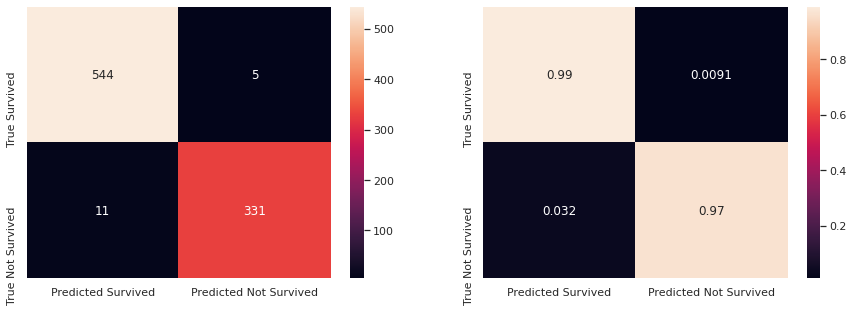

In [153]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)

sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

# 6. Submission file

In [154]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_decision_tree1
    })
submission.to_csv('Result_update.csv', index=False)